In [34]:

import pandas as pd

df = pd.read_csv('insurance.csv')

print(df.head(3))

   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620


I took all the data and wanted to see what it looks like with headers and cells

In [35]:

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nNumber of nulls in each column:")
print(df.isnull().sum())

Number of rows: 1338
Number of columns: 7

Number of nulls in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


I wanted to see how much i had and if there was any missing data

In [20]:

average_age = df['age'].mean()
average_bmi = df['bmi'].mean()

average_children = df['children'].mean()
average_charges = df['charges'].mean()

sex_counts = df['sex'].value_counts()
total_count = sex_counts.sum()

percentage_male = (sex_counts['male'] / total_count) * 100
percentage_female = (sex_counts['female'] / total_count) * 100

region_counts = df['region'].value_counts()
total_region_count = region_counts.sum()
print("\nPercentage of each region:")

for region, count in region_counts.items():
  percentage = (count / total_region_count) * 100
  print(f"{region}: {percentage:.2f}%")

smoker_counts = df['smoker'].value_counts()
total_smoker_count = smoker_counts.sum()
print("\nPercentage of smokers:")

for smoker, count in smoker_counts.items():
  percentage = (count / total_smoker_count) * 100
  print(f"{smoker}: {percentage:.2f}%")

print(f"\nPercentage of males: {percentage_male:.2f}%")
print(f"Percentage of females: {percentage_female:.2f}%")

print(f"\nAverage charges: {average_charges}")
print(f"\nAverage age: {average_age}")

print(f"\nAverage BMI: {average_bmi}")
print(f"\nAverage number of children: {average_children}")




Percentage of each region:
southeast: 27.20%
southwest: 24.29%
northwest: 24.29%
northeast: 24.22%

Percentage of smokers:
no: 79.52%
yes: 20.48%

Percentage of males: 50.52%
Percentage of females: 49.48%

Average charges: 13270.422265141257

Average age: 39.20702541106129

Average BMI: 30.66339686098655

Average number of children: 1.0949177877429


I created high level averages for myself to see in what ranges the numbers will be and what the shares are of certain columns.

In [36]:

average_charges_per_smoker = df.groupby('smoker')['charges'].mean()

print("\nAverage Charges per Smoker (in $):")
for smoker, avg_charges in average_charges_per_smoker.items():
  print(f"{smoker}: ${avg_charges:.2f}")


Average Charges per Smoker (in $):
no: $8434.27
yes: $32050.23


In [28]:

print("\nAverage Charges by Region (in $):")
for region, avg_charges in average_charges_by_region.items():
  print(f"{region}: ${avg_charges:.2f}")


Average Charges by Region (in $):
northeast: $13406.38
northwest: $12417.58
southeast: $14735.41
southwest: $12346.94


In [33]:
average_charges_per_age = df.groupby('age')['charges'].mean()

print("\nAverage Charges per Age (in $):")
for age, avg_charges in average_charges_per_age.items():
  print(f"{age}: ${avg_charges:.2f}")


Average Charges per Age (in $):
18: $7086.22
19: $9747.91
20: $10159.70
21: $4730.46
22: $10012.93
23: $12419.82
24: $10648.02
25: $9838.37
26: $6133.83
27: $12184.70
28: $9069.19
29: $10430.16
30: $12719.11
31: $10196.98
32: $9220.30
33: $12351.53
34: $11613.53
35: $11307.18
36: $12204.48
37: $18019.91
38: $8102.73
39: $11778.24
40: $11772.25
41: $9653.75
42: $13061.04
43: $19267.28
44: $15859.40
45: $14830.20
46: $14342.59
47: $17654.00
48: $14632.50
49: $12696.01
50: $15663.00
51: $15682.26
52: $18256.27
53: $16020.93
54: $18758.55
55: $16164.55
56: $15025.52
57: $16447.19
58: $13878.93
59: $18895.87
60: $21979.42
61: $22024.46
62: $19163.86
63: $19885.00
64: $23275.53


In [30]:

average_charges_per_children = df.groupby('children')['charges'].mean()

print("\nAverage Charges per Children (in $):")
for children, avg_charges in average_charges_per_children.items():
  print(f"{children}: ${avg_charges:.2f}")


Average Charges per Children (in $):
0: $12365.98
1: $12731.17
2: $15073.56
3: $15355.32
4: $13850.66
5: $8786.04


In [32]:

average_charges_per_sex = df.groupby('sex')['charges'].mean()

print("\nAverage Charges per Sex (in $):")
for sex, avg_charges in average_charges_per_sex.items():
  print(f"{sex}: ${avg_charges:.2f}")


Average Charges per Sex (in $):
female: $12569.58
male: $13956.75


In [36]:

from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['children', 'bmi', 'charges', 'age']

scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print("\nDataFrame after normalization:")
print(df.head())


DataFrame after normalization:
        age     sex       bmi  children smoker     region   charges
0  0.021739  female  0.321227       0.0    yes  southwest  0.251611
1  0.000000    male  0.479150       0.2     no  southeast  0.009636
2  0.217391    male  0.458434       0.6     no  southeast  0.053115
3  0.326087    male  0.181464       0.0     no  northwest  0.333010
4  0.304348    male  0.347592       0.0     no  northwest  0.043816


In [37]:

columns_to_standardize = ['children', 'bmi', 'charges', 'age']

scaler = StandardScaler()

df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

print("\nDataFrame after standardization:")
print(df.head())


DataFrame after standardization:
        age     sex       bmi  children smoker     region   charges
0 -1.438764  female -0.453320 -0.908614    yes  southwest  0.298584
1 -1.509965    male  0.509621 -0.078767     no  southeast -0.953689
2 -0.797954    male  0.383307  1.580926     no  southeast -0.728675
3 -0.441948    male -1.305531 -0.908614     no  northwest  0.719843
4 -0.513149    male -0.292556 -0.908614     no  northwest -0.776802


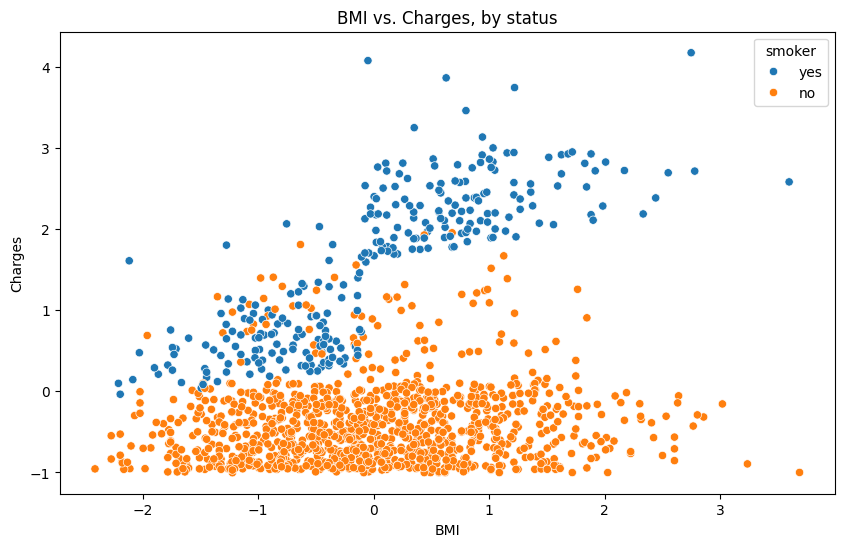

In [74]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs. Charges, by status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

From this we are able to see how bmi score effects the price.

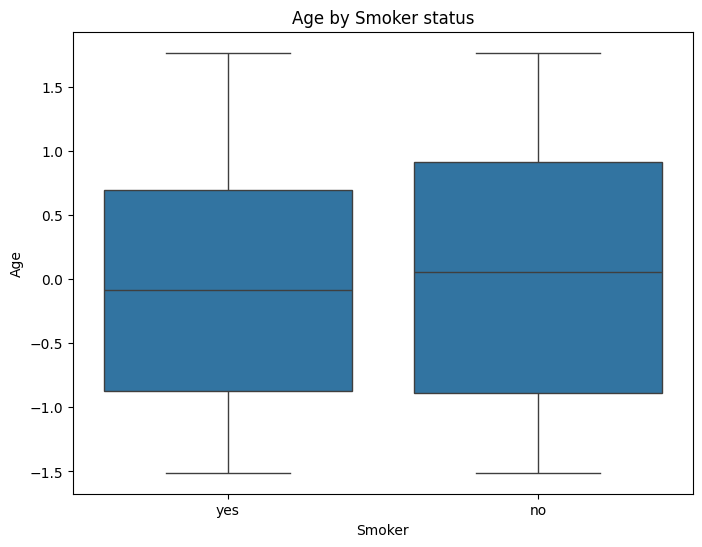

In [62]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='age')
plt.title('Age by Smoker status')
plt.xlabel('Smoker')
plt.ylabel('Age')
plt.show()


Now we can also see that smokers tend to quit as they get older.

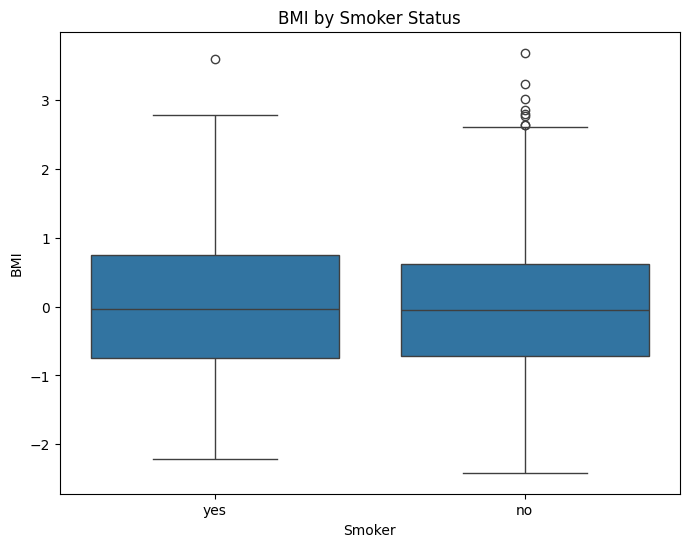

In [76]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='bmi', data=df)
plt.title('BMI by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('BMI')
plt.show()

Bmi decreases with age, and more people quit as they get older.

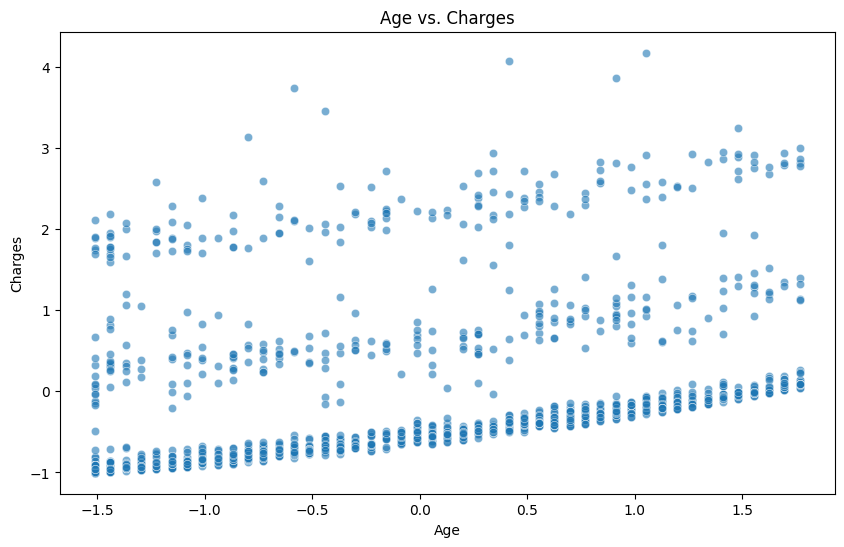

In [68]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', alpha=0.6)
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

From this we can see how age plays into price (charges)


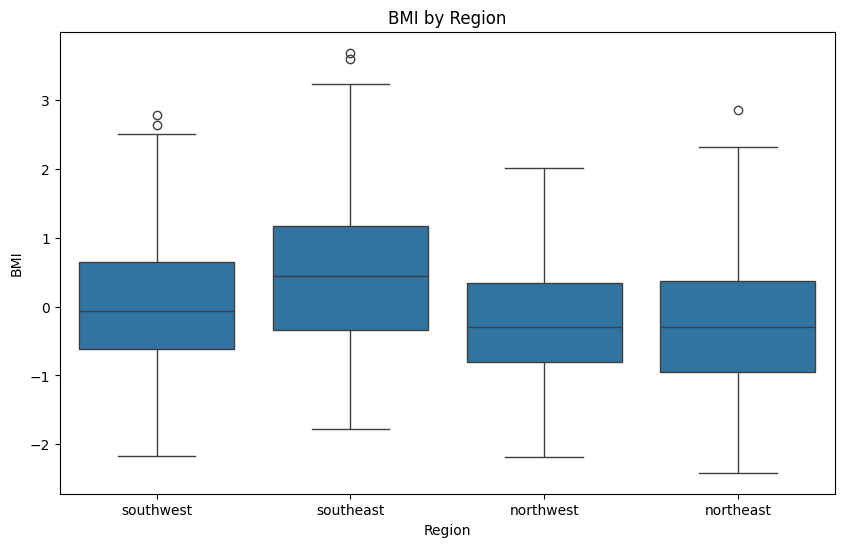

In [70]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='bmi')
plt.title('BMI by Region')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.show()

This also shows how bmi score effects regions


Average Charges by Region (in $):
northeast: $0.01
northwest: $-0.07
southeast: $0.12
southwest: $-0.08


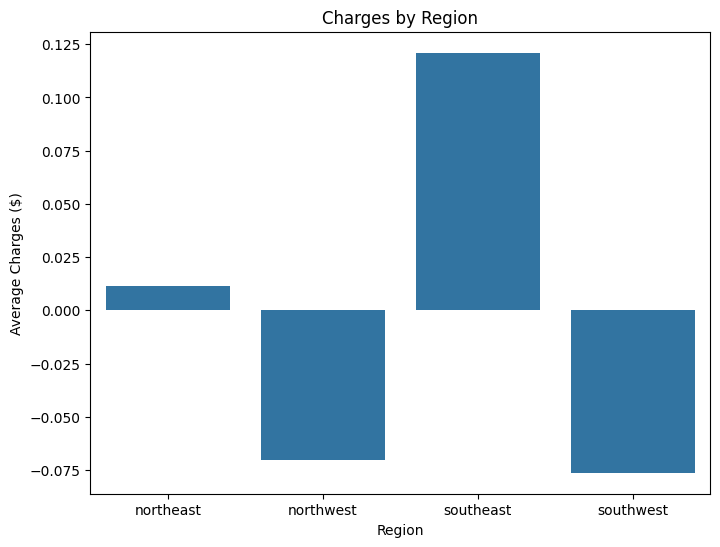

In [75]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


average_charges_by_region = df.groupby('region')['charges'].mean()

print("\nAverage Charges by Region (in $):")
for region, avg_charges in average_charges_by_region.items():
  print(f"{region}: ${avg_charges:.2f}")

plt.figure(figsize=(8, 6))
sns.barplot(x=average_charges_by_region.index, y=average_charges_by_region.values)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges ($)')
plt.show()


proving higher bmi higher price through regions

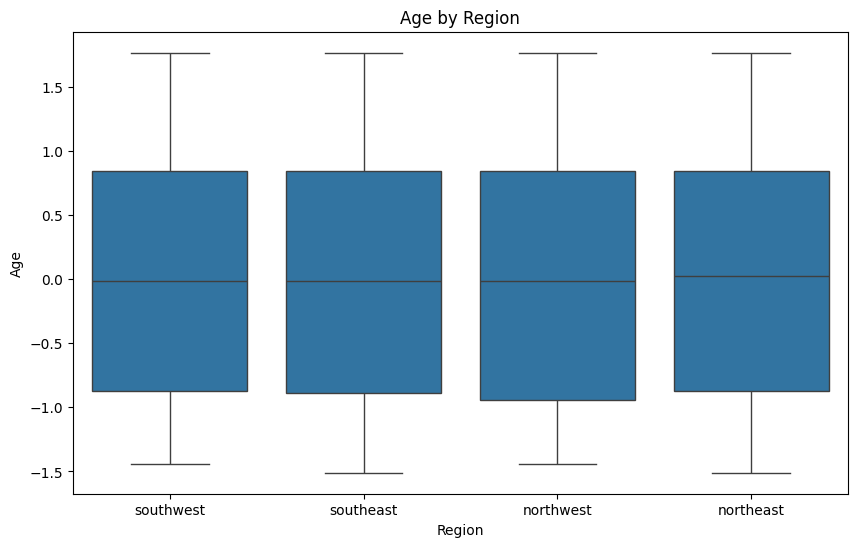

In [79]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='age')
plt.title('Age by Region')
plt.xlabel('Region')
plt.ylabel('Age')
plt.show()

Here we can see how age equal by region so it doesnt effect our hypothesis


Average Charges per Rounded BMI (in $):
 bmi_rounded   charges
        -2.0 -0.402163
        -1.0 -0.182308
        -0.0 -0.030360
         1.0  0.276944
         2.0  0.255624
         3.0  0.346808
         4.0  0.789891


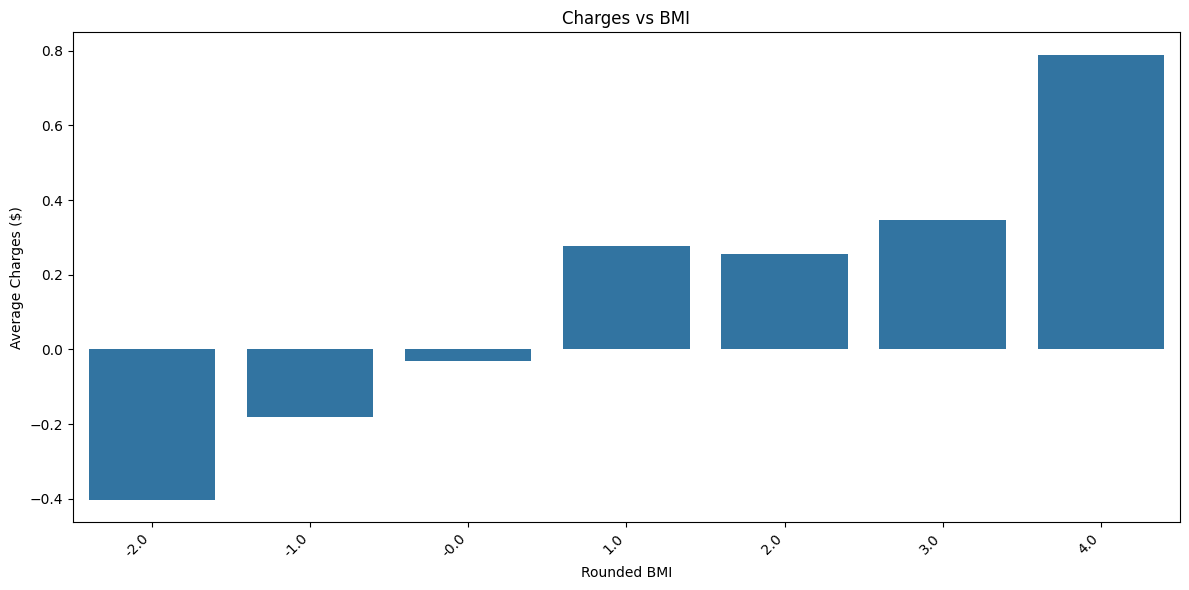

In [71]:

import matplotlib.pyplot as plt


df['bmi_rounded'] = df['bmi'].round(0)

average_charges_per_bmi_rounded = df.groupby('bmi_rounded')['charges'].mean().reset_index()

print("\nAverage Charges per Rounded BMI (in $):")
print(average_charges_per_bmi_rounded.to_string(index=False))


plt.figure(figsize=(12, 6))
sns.barplot(x='bmi_rounded', y='charges', data=average_charges_per_bmi_rounded)
plt.title('Charges vs BMI')
plt.xlabel('Rounded BMI')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()